In [1]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
from data_import import df_stocks
from data_import import df_weather
import pandas as pd
import numpy as np

              Volume  % Change
Date                          
2005-02-25  70221808  0.973561
2005-02-28  79695344 -0.445287
2005-03-01  54607412  0.380156
2005-03-02  73733090  0.342173
2005-03-03  71286823 -0.358524
...              ...       ...
2017-11-06  49529148  0.212931
2017-11-07  57218448 -0.115844
2017-11-08  50277699  0.247611
2017-11-09  94537282  0.170721
2017-11-10  59862364  0.139681

[3201 rows x 2 columns]
            TMAX  TMIN  TOTALPRCP
DATE                             
1970-01-01    25    19       2.00
1970-01-02    30    18       2.00
1970-01-03    36    25       1.04
1970-01-04    31    20       1.00
1970-01-05    34    18       1.00
...          ...   ...        ...
2019-12-28    51    43       0.00
2019-12-29    44    39       0.25
2019-12-30    41    37       0.74
2019-12-31    45    36       0.02
2020-01-01    41    34       0.00

[18263 rows x 3 columns]


Stocks Z-Score:

In [2]:
# df_stocks.apply(zscore)

cols = list(df_stocks.columns)

for col in cols:
    col_zscore = col + ' Zscore'
    df_stocks[col_zscore] = (df_stocks[col] - df_stocks[col].mean())/df_stocks[col].std(ddof=0)
    
df_stocks

,Volume,% Change,Volume Zscore,% Change Zscore
Date,,,,
2005-02-25,70221808,0.973561,-0.828570,1.018158
2005-02-28,79695344,-0.445287,-0.748335,-0.484756
2005-03-01,54607412,0.380156,-0.960814,0.389594
2005-03-02,73733090,0.342173,-0.798832,0.349360
2005-03-03,71286823,-0.358524,-0.819550,-0.392853
...,...,...,...,...
2017-11-06,49529148,0.212931,-1.003823,0.212460
2017-11-07,57218448,-0.115844,-0.938700,-0.135794
2017-11-08,50277699,0.247611,-0.997483,0.249195


Weather Z-Scores

In [3]:
cols = list(df_weather.columns)

for col in cols:
    col_zscore = col + ' Zscore'
    df_weather[col_zscore] = (df_weather[col] - df_weather[col].mean())/df_weather[col].std(ddof=0)
    
df_weather

,TMAX,TMIN,TOTALPRCP,TMAX Zscore,TMIN Zscore,TOTALPRCP Zscore
DATE,,,,,,
1970-01-01,25,19,2.00,-2.056840,-1.742651,0.832621
1970-01-02,30,18,2.00,-1.784551,-1.802724,0.832621
1970-01-03,36,25,1.04,-1.457804,-1.382216,0.307060
1970-01-04,31,20,1.00,-1.730093,-1.682579,0.285162
1970-01-05,34,18,1.00,-1.566720,-1.802724,0.285162
...,...,...,...,...,...,...
2019-12-28,51,43,0.00,-0.640937,-0.300912,-0.262297
2019-12-29,44,39,0.25,-1.022142,-0.541202,-0.125432
2019-12-30,41,37,0.74,-1.185515,-0.661347,0.142823


Vizualization - Z Scores

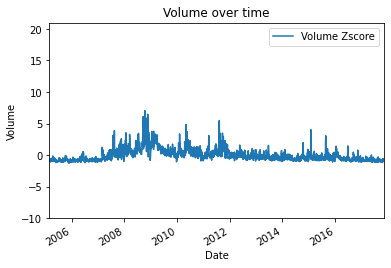

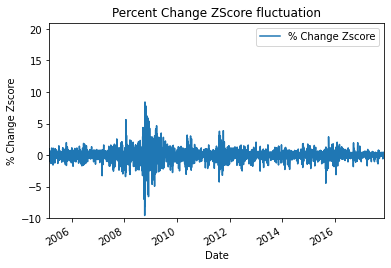

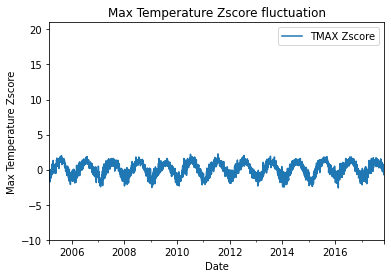

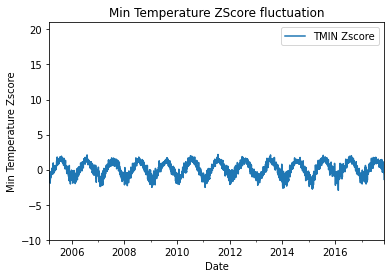

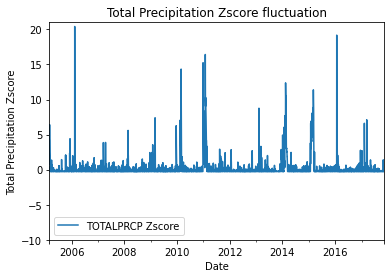

In [22]:
df_stocks.plot(y = "Volume Zscore")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.title("Volume over time")
plt.axis([df_stocks.index.min(), df_stocks.index.max(), -10, 21])
plt.show()

df_stocks.plot(y = "% Change Zscore")
plt.xlabel("Date")
plt.ylabel("% Change Zscore")
plt.title("Percent Change ZScore fluctuation")
plt.axis([df_stocks.index.min(), df_stocks.index.max(), -10, 21])
plt.show()

df_weather[df_stocks.index.min() : df_stocks.index.max()].plot(y = "TMAX Zscore")
plt.xlabel("Date")
plt.ylabel("Max Temperature Zscore")
plt.title("Max Temperature Zscore fluctuation")
plt.axis([df_stocks.index.min(), df_stocks.index.max(), -10, 21])
plt.show()

df_weather[df_stocks.index.min() : df_stocks.index.max()].plot(y = "TMIN Zscore")
plt.xlabel("Date")
plt.ylabel("Min Temperature Zscore")
plt.title("Min Temperature ZScore fluctuation")
plt.axis([df_stocks.index.min(), df_stocks.index.max(), -10, 21])
plt.show()

df_weather[df_stocks.index.min() : df_stocks.index.max()].plot(y = "TOTALPRCP Zscore")
plt.xlabel("Date")
plt.ylabel("Total Precipitation Zscore")
plt.title("Total Precipitation Zscore fluctuation")
plt.axis([df_stocks.index.min(), df_stocks.index.max(), -10, 21])
plt.show()



In [11]:
stock_percent = df_stocks['% Change'].values.reshape(-1,1)
weather_precip = df_weather[df_stocks.index.min() : df_stocks.index.max()]['TOTALPRCP'].values.reshape(-1,1)

In [12]:
print(len(stock_percent))
print(len(weather_precip))

3201
4642


In [29]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  
linear_regressor.fit(weather_precip, stock_percent)  
Y_pred = linear_regressor.predict(weather_precip) 